In [1]:
import cmath
import numpy as np
import time

def kernel(en, kT, mu, r, T):
    pi = np.pi
    E = np.zeros((9, 9))
    for i in range(9):
        for j in range(9):
            E[i, j] = en[i] - en[j]
    
    W = np.zeros((9, 9))
    
    for i0 in range(9):
        for i2 in range(9):
            a0 = [i0, i0]
            a2 = [i2, i2]
            
            for p1 in [-1, 1]:
                for p2 in [-1, 1]:
                    for eta1 in [-1, 1]:
                        for i1m in range(9):
                            for i1p in range(9):
                                a1 = [0, i1m, i1p]
                                D0 = dirac(a2[-p2], a1[-p2]) * dirac(a1[-p1], a0[-p1])
                                
                                if D0 != 0:
                                    Q = 0
                                    for s1 in range(2):
                                        Q += T[a2[p2], a1[p2], r, s1, -eta1 * p2] * T[a1[p1], a0[p1], r, s1, eta1 * p1]
                                    
                                    if Q != 0:
                                        W[i2, i0] -= D0 * Q * p2 * p1 * pi * fermi(p1 * (E[a1[1], a1[-1]] - eta1 * mu[r]), kT)
                                        

    return W

def dirac(a, b):
    if a == b:
        return 1
    else:
        return 0

def fermi(x, kT):
    return 1 / (np.exp(x / kT) + 1)

#Function that calculates the current for two voltages
def corriente(v1, v2, tc, u, d):
    #d = np.array([[1, .3], [.05, .9]])
    e = np.array([v1, v2])
    eL = v1*d[0,0]+v2*d[0,1]
    eR = v1*d[1,0]+v2*d[1,1]
    ep = 0.5 * (eL + eR)
    ed = eL - eR
    a1 = 1 - ed / np.sqrt(ed ** 2 + tc ** 2)
    a2 = 1 + ed / np.sqrt(ed ** 2 + tc ** 2)
    Tm = np.zeros((9, 9, 2, 2, 3))
            
    tL = 0.1 * np.sqrt(kT / (8 * pi))
    tR = 0.1 * np.sqrt(kT / (8 * pi))
            
    v[0, 0] = tL / np.sqrt(2) * np.sqrt(a1)
    v[0, 1] = -tL / np.sqrt(2) * np.sqrt(a2)
    v[1, 0] = tR / np.sqrt(2) * np.sqrt(a2)
    v[1, 1] = tR / np.sqrt(2) * np.sqrt(a1)
            
    for i in range(2):
        Tm[1, 0, i, 0, 1] = v[i, 0]
        Tm[0, 1, i, 0, -1] = v[i, 0]
        Tm[2, 0, i, 1, 1] = v[i, 0]
        Tm[0, 2, i, 1, -1] = v[i, 0]
        Tm[3, 0, i, 0, 1] = v[i, 1]
        Tm[0, 3, i, 0, -1] = v[i, 1]
        Tm[4, 0, i, 1, 1] = v[i, 1]
        Tm[0, 4, i, 1, -1] = v[i, 1]
                
        Tm[5, 1, i, 0, 1] = -v[i, 1]
        Tm[1, 5, i, 0, -1] = -v[i, 1]
        Tm[6, 1, i, 1, 1] = -v[i, 1] * dirac(i, 1)
        Tm[1, 6, i, 1, -1] = -v[i, 1] * dirac(i, 1)
        Tm[7, 1, i, 1, 1] = -v[i, 1] * dirac(i, 0)
        Tm[1, 7, i, 1, -1] = -v[i, 1] * dirac(i, 0)
                
        Tm[6, 2, i, 0, 1] = -v[i, 1] * dirac(i, 0)
        Tm[2, 6, i, 0, -1] = -v[i, 1] * dirac(i, 0)
        Tm[7, 2, i, 0, 1] = -v[i, 1] * dirac(i, 1)
        Tm[2, 7, i, 0, -1] = -v[i, 1] * dirac(i, 1)
        Tm[8, 2, i, 1, 1] = -v[i, 1]
        Tm[2, 8, i, 1, -1] = -v[i, 1]
                
        Tm[5, 3, i, 0, 1] = v[i, 0]
        Tm[3, 5, i, 0, -1] = v[i, 0]
        Tm[6, 3, i, 1, 1] = v[i, 0] * dirac(i, 1)
        Tm[3, 6, i, 1, -1] = v[i, 0] * dirac(i, 1)
        Tm[7, 3, i, 1, 1] = v[i, 0] * dirac(i, 0)
        Tm[3, 7, i, 1, -1] = v[i, 0] * dirac(i, 0)
                
        Tm[6, 4, i, 0, 1] = v[i, 0] * dirac(i, 0)
        Tm[4, 6, i, 0, -1] = v[i, 0] * dirac(i, 0)
        Tm[7, 4, i, 0, 1] = v[i, 0] * dirac(i, 1)
        Tm[4, 7, i, 0, -1] = v[i, 0] * dirac(i, 1)
        Tm[8, 4, i, 1, 1] = v[i, 0]
        Tm[4, 8, i, 1, -1] = v[i, 0]
            
    en[0] = 0
    en[1] = ep - 0.5 * np.sqrt(ed ** 2 + tc ** 2)
    en[2] = ep - 0.5 * np.sqrt(ed ** 2 + tc ** 2)
    en[3] = ep + 0.5 * np.sqrt(ed ** 2 + tc ** 2)
    en[4] = ep + 0.5 * np.sqrt(ed ** 2 + tc ** 2)
    en[5] = 2 * ep + u
    en[6] = 2 * ep + u
    en[7] = 2 * ep + u
    en[8] = 2 * ep + u
            
    WL = kernel(en, kT, mu, 0, Tm)
    WR = kernel(en, kT, mu, 1, Tm)
            
    for i in range(9):
        for j in range(9):
            Wx[i,j] = WL[i,j]+WR[i,j]-WL[i,i]-WR[i,i]
            WI[i,j] = (nc[i]-nc[j])*WL[i,j]
            
    vx = -np.diag(WL) - np.diag(WR)
            
    Qx = Wx+0j
            
    for i in range(9):
        Qx[i,i]=0+1e-5j
            
    Qx_inv = np.linalg.inv(Qx)
    p = np.matmul(Qx_inv, vx)
                    
    Ic = np.matmul(et, np.matmul(WI, p))
    Ic = np.real(Ic)
    
    return Ic

In [2]:
#Parameter creation function
def parameters():
    d0 = 1
    d1 = 0
    sd = 0.25
    d[0,0] = np.random.normal(d0, sd)
    d[0,1] = abs(np.random.normal(d1, sd))
    d[1,0] = abs(np.random.normal(d1, sd))
    d[1,1] = np.random.normal(d0, sd)
    
    return d

In [3]:
#Start the variables that need to be started
Qx = np.zeros((9, 9), dtype=complex)
Qx_inv = np.zeros((9, 9), dtype=complex)
pi = np.arccos(-1)
en = np.zeros(9)
mu = np.zeros(2)
v = np.zeros((2, 2))
d = np.zeros((2, 2))
Tm = np.zeros((9, 9, 2, 2, 3))
WL = np.zeros((9, 9))
WR = np.zeros((9, 9))
Wx = np.zeros((9, 9))
WI = np.zeros((9, 9))
vx = np.zeros(9)
p = np.zeros(9)
et = np.ones(9)

#Definition of charge blocks
nc = np.array([0, 1, 1, 1, 1, 2, 2, 2, 2])

#Number of pixels per side
l = 30

#Define fixed parameters
kT = 1
u = 30*kT
tc = 5*kT
vb = 15 * kT
mu[0] = 0.5 * vb
mu[1] = -0.5 * vb
u1 = 0*kT
u2 = 0*kT
v1min = u1-40*kT
v2min = u2-40*kT
v1max = u1+20*kT
v2max = u2+20*kT
v1 = np.linspace(v1min, v1max, l)
v2 = np.linspace(v2min, v2max, l)
v1_grid, v2_grid = np.meshgrid(v1, v2)

In [4]:
def data(n):
    for m in range(n):
        d = np.array([[0.8096193 , 0.11090629], [0.21346375, 1.0498824 ]])
        currents = np.zeros((len(v1), len(v2)))
    
        for i in range(len(v1)):
            for j in range(len(v2)):
                currents[i, j] = corriente(v1[i], v2[j], tc, u, d)
            
            
        # Create a dictionary to store both data structures
        data_dict = {
            'current': currents,
            'd': d,
            'v1': v1,
            'v2': v2
        }

        unique_id = time.strftime("%Y%m%d%H%M%S")

        np.save(f'Data/data_{unique_id}.npy', data_dict)

In [5]:
data(2)

/tmp/ipykernel_7006/124552001.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


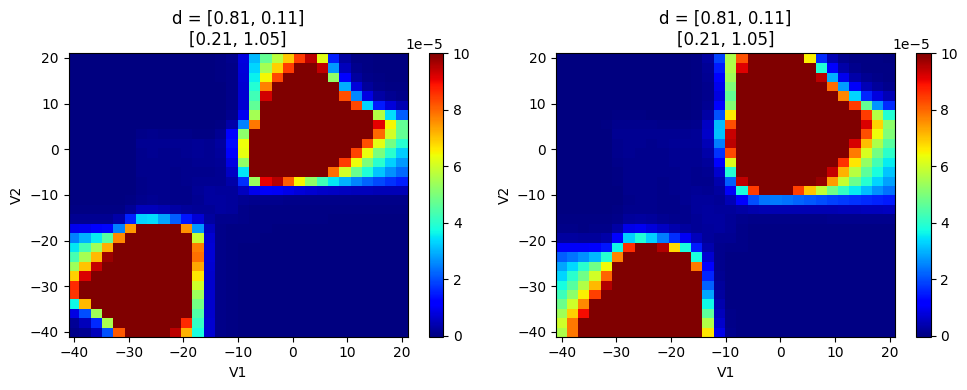

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import pickle
import imp
import glob
import os
import h5py

files = glob.glob(os.getcwd() + "/Data/*.npy")

f = h5py.File('dataset.h5', 'r')
dset = f['group']['data'][0]

dset = np.array(dset)

data_dict = np.load(files[2], allow_pickle=True).item()
x = data_dict['v1']
y = data_dict['v2']
current = dset.transpose()
d = data_dict['d']

X, Y = np.meshgrid(x, y)

data_dict = np.load(files[2], allow_pickle=True).item()
x1 = data_dict['v1']
y1 = data_dict['v2']
current1 = data_dict['current']
d1 = data_dict['d']

X1, Y1 = np.meshgrid(x1, y1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first image
img1 = ax1.pcolor(X, Y, current, vmax=1e-4, cmap='jet')
ax1.set_xlabel('V1')
ax1.set_ylabel('V2')
formatted_d = [['{:.2f}'.format(x) for x in row] for row in d]
legend_text = 'd = ' + '\n'.join(['[' + ', '.join(row) + ']' for row in formatted_d])
ax1.set_title(legend_text)
fig.colorbar(img1, ax=ax1)

# Plot the second image
img2 = ax2.pcolor(X1, Y1, current1, vmax=1e-4, cmap='jet')
ax2.set_xlabel('V1')
ax2.set_ylabel('V2')
formatted_d = [['{:.2f}'.format(x) for x in row] for row in d1]
legend_text = 'd = ' + '\n'.join(['[' + ', '.join(row) + ']' for row in formatted_d])
ax2.set_title(legend_text)
fig.colorbar(img2, ax=ax2)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()
